# Introduction to Neural Networking in Keras

We will use the version of Keras that comes in the Tensorflow package, as it has the most up to date tools.

Keras works as weapper for deep learning model to be used as classification or regression estimators in sklearn

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# new libraries
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

### Plot History

Since we will be plotting histories for all of our models, lets create a function to do it quickly.

In [11]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

# Data

We will be working with 2 different datasets in this project, 1 is a regression dataset and the other is a classification dataset.  This way you can practice doing both using deep learning.

**NOTE**

These datasets are very small for deep learning.  Deep learning models usually work best with very large datasets with at least 10,000 or more samples.  They work best on even larger datasets than that.  But, for demonstration we will use these smaller datasets.

## Regression
This is a dataset of housing prices in Boston from 1978.  Each row is a house and the dataset includes several features regarding each house.  Our target today will be the price of the home.



In [12]:
regression_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/Boston_Housing_from_Sklearn.csv')

# Regression

Let's start with modeling the regression dataset

In [13]:
regression_df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [14]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [15]:
regression_df.duplicated().any()

False

In [16]:
regression_df.describe()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [17]:
# Define X and Y and complete the train test split
X = regression_df.drop(columns = 'PRICE')
y = regression_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Scaling

Always scale your data for deep learning.  Otherwise you get a problem call 'Exploding Weights'.  Some weights will be updated much faster than others because the inputs are at larger scales.  This tends to hurt learning as data on smaller scales does not update as fast and doesn't get to contribute as much to the decision making process.  By scaling we put all features on the same footing.

In [18]:
# Scale the data
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## First Simple Model

We always want to start simple, as deep learning models can get very complex fast and more complex models take more time to train and are more prone to overfitting.  A well performing simple model is better than a well performing complex model.

## Input layer
The first layer we will define is not technically the input layer.  We will define the first hidden layer with a special argument that tells Keras how to create a input layer:

`input_dim=`

Input layers can also be defined manually using tensorflow.keras.layers.InputLayer

## Activation function

For the single hidden layer we will try just 3 nodes and use a ReLU activation.  ReLUs tend to perform well for hidden layers.

## Output Layer

For out output layer (last layer) we just use one node because we only want the output of the model to be one number.  We will use a linear activation function.  This will simply output the value from the weights and bias in the node with no change.  The output will be a continuous number, a float.  This will make our model a regression model.




# Note:
### The first layer you define will NOT be the input layer!  Keras will create an input layer on its own, implicitly.

In [20]:
del model
# Instantiate your sequential model
model = Sequential()
# Add first hidden layer with 3 neurons THIS IS NOT THE INPUT LAYER!
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
# Tell Keras how to construct the input layer shape using input_dim

# Add output layer with 1 node
model.add(Dense(1, activation='linear'))
# Check summary of network 
model.summary()

# Compile your model.
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


## Compiling

Compiling the model puts all the pieces together to make it ready to train.  

For this step, we need to specify a few other hyperparameters:

* **Optimizer:** An Adam optimizer is a favorite and often performs well, it's a good place to start.
  - Other optimizers : Gradient Descent, Stochastic Gradient Descent, Adagrad, RMSProp
* **Loss Function:** 'mse' or mean squared error.  This is the number our model will try to reduce in each epoch.  Since this is a regression model we want our model to minimize the mean squared error.  A loss function ALWAYS needs to be a measurement of the total error that the model can REDUCE.  R^2 won't work because higher is better. We don't want the model to reduce R^2!
* **Metrics:** 'mae' or mean absolute error.  We can provide a list of any appropriate metrics we want the model to keep track at each epoch.




# Training (AKA fitting)

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [25]:
# Fit your model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: 470.1064 - mae: 19.3115 - val_loss: 386.1812 - val_mae: 17.5247
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 452.9309 - mae: 18.8503 - val_loss: 370.4486 - val_mae: 17.0487
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 435.1167 - mae: 18.3486 - val_loss: 353.9107 - val_mae: 16.5299
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 416.4976 - mae: 17.8076 - val_loss: 336.5451 - val_mae: 15.9752
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 396.8076 - mae: 17.2274 - val_loss: 318.7095 - val_mae: 15.3902
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 376.8595 - mae: 16.6197 - val_loss: 300.1637 - val_mae: 14.7755
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 355.9153 - mae: 15.9953 - val_loss: 281.5222 - val_mae: 14.1328
Epoch 8/100
12/12 [=====================

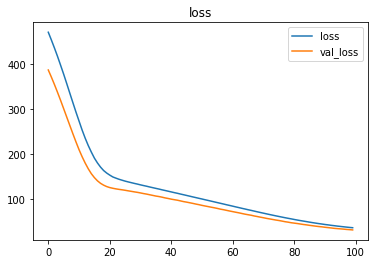

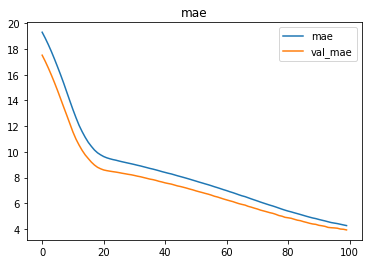

In [26]:
# Apply the custom function plot_history() to see how your model is doing
plot_history(history)

## Evaluation


In [27]:
# Make predictions and evaluate your model
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('training MAE:', mean_absolute_error(y_train, train_preds))
print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('training R2:', r2_score(y_train, train_preds))
print('testing MAE:', mean_absolute_error(y_test, test_preds))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))
print('testing R2:', r2_score(y_test, test_preds))

4/4 [==============================] - 0s 3ms/step
training MAE: 4.235144540942753
training rmse: 5.929070879263818
training R2: 0.6035950033761295
testing MAE: 3.9216401505658007
testing rmse: 5.5370958890198665
testing R2: 0.5621779029634371


# <center> Temperature Check: </center>
## On a scale of 0 - 5, how confident do you feel in coding neural networks?

0. What is a neural net?
1. I know what a neural net is, but I don't know how to even start coding one.
2. I kinda get how the code flows, but need help from someone else to create my own.
3. I understand the general idea, and could code a neural net in Keras if I had an example in front of me.
4. I feel confident in coding a neural network with some reference materials.
5. Move over, Josh.  I can finish this code-along.


# 🦾 Your Turn: Classification Models in Keras

Classification models are similar, except that we need to adjust:
* The final activation of the output layer, and
* The loss function and metrics in the compile step.

We will also need to do some processing of the predictions after training to make them integers instead of floats.

### Remember: 
MAE, MSE, RMSE, and R2 are regression metrics,

accuracy, recall, precision, and F1-Score are classification metrics.

## Classification Dataset
The classification dataset describes diabetes rates among Pima Indians.  Each row is a person and this dataset includes features regarding health related measurements.  The target is binary and represents whether or not a person will diagnosed with diabetes.  This is another old dataset first presented in 1988.



In [28]:
classification_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/diabetes.csv')
classification_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
classification_df.duplicated().any()

False

In [31]:
classification_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see minimums for Glucose, BloodPression, SkinThickness, Insulin, and BMI of 0s.  Those are impossible for humans, so lets drop those rows.

In [32]:
no_glucose = classification_df['Glucose'] == 0
no_blood = classification_df['BloodPressure'] == 0
no_skin = classification_df['SkinThickness'] == 0
no_insulin = classification_df['Insulin'] == 0
no_bmi = classification_df['BMI'] == 0

#class_df_clean excludes rows that have no values == 0 in the above columns
class_df_clean = classification_df[~(no_glucose |
                                     no_blood |
                                     no_skin |
                                     no_insulin |
                                     no_bmi)]
class_df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We lost a lot of data, going from 768 samples to 392 samples.  In the future we might impute this data using means, medians, or other imputation strategies.  For this exercise we won't focus on that.

In [33]:
# Define X and y and train test split
X = class_df_clean.drop(columns = 'Outcome')
y = class_df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [34]:
# Scale the data
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Build the Classification Model

We need to do a few things differently here because this is a binary classification:

1. The activation of our final layer needs to be 'sigmoid'.  


(If this were multiclass classification, we would set the final activation as 'softmax' and the number of output nodes would be the number of classes in our y_train.)

In [35]:
# Build your model
model = Sequential()
# One output node with 'sigmoid' activation
model.add(Dense(12, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 9)                 117       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


## More Changes for Classification:

1.  We need to change our loss to 'binary_crossentropy', or 'bce'.  If this were multiclass we would use 'categorical_crossentrobpy'.

2. Our metrics should be classification metrics.  We will use accuracy and import recall and precision. 

In [36]:
from keras.metrics import Precision, Recall

# Compile your model with loss='bce, set metrics = ['acc', Precision(), Recall()]
model.compile(loss='bce', optimizer='sgd', metrics=['acc', Precision(), Recall()])

In [37]:
# fit your model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), 
                    epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 40ms/step - loss: 0.7300 - acc: 0.3163 - precision: 0.3086 - recall: 0.8469 - val_loss: 0.7219 - val_acc: 0.2857 - val_precision: 0.2683 - val_recall: 0.6875
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7146 - acc: 0.3299 - precision: 0.2911 - recall: 0.7041 - val_loss: 0.7094 - val_acc: 0.3469 - val_precision: 0.2778 - val_recall: 0.6250
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7038 - acc: 0.4456 - precision: 0.3224 - recall: 0.6020 - val_loss: 0.6983 - val_acc: 0.4898 - val_precision: 0.3125 - val_recall: 0.4688
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6944 - acc: 0.5340 - precision: 0.3361 - recall: 0.4082 - val_loss: 0.6882 - val_acc: 0.6224 - val_precision: 0.3684 - val_recall: 0.2188
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6860 - acc: 0.6088 - precision: 0.3191 - recall: 0.1531 - val_loss: 0.6800 - 

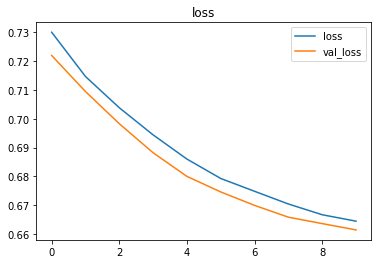

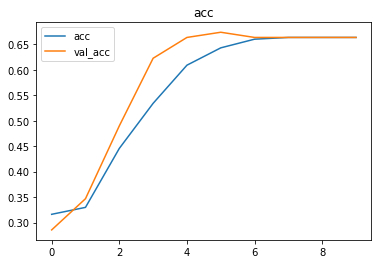

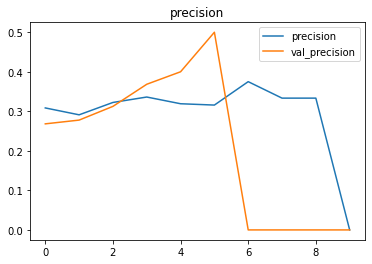

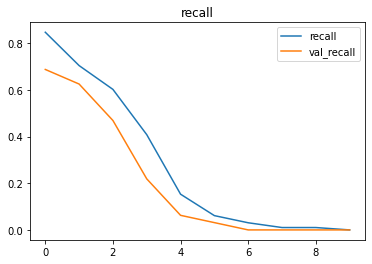

In [38]:
# See how your model is doing
plot_history(history)

## Evaluation

Keras models always output floats, not integers.  In this case the final sigmoid activation function will return a number between 0 and 1.  If the number is closer to 1, the model predicts the sample is more likely to be class 1.  If it is closer to 2, the sample is predicted to be more likely to be class 0.  

This is similar to the output of .predict_proba() with Scikit-Learn models.

### Converting Floats to Ints

In order to use Scikit-Learn metrics functions, the float outputs of the model need to be converted to ints.  We don't want to just use `int(pred)` or `pred.astype(int)` because that will just drop the decimal and all our predictions would be 0s.  

Instead we want to **round** the predictions to the nearest integer. To round all of the numbers in an array we can use the NumPy function, `np.rint()` which is short for 'round to integer'.  

In [39]:
model.predict(X_train)[:5]

10/10 [==============================] - 0s 2ms/step


array([[0.46752217],
       [0.45419592],
       [0.41112116],
       [0.4357451 ],
       [0.41908553]], dtype=float32)

In [41]:
# Get predictions and use np.rint(pred) round them to integers instead of floats
train_preds = np.rint(model.predict(X_train))
test_preds = np.rint(model.predict(X_test))

# the following code should show whole number predictions, 1.0 or 0.0
print(test_preds[:5])
print(train_preds[:5])

4/4 [==============================] - 0s 2ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Training Scores
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       196
           1       0.00      0.00      0.00        98

    accuracy                           0.66       294
   macro avg       0.33      0.50      0.40       294
weighted avg       0.44      0.66      0.53       294



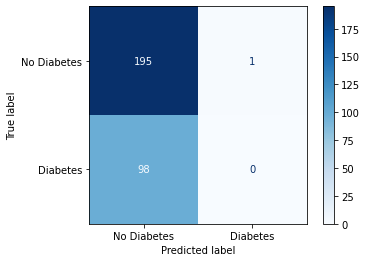



Testing Scores
              precision    recall  f1-score   support

           0       0.67      0.98      0.80        66
           1       0.00      0.00      0.00        32

    accuracy                           0.66        98
   macro avg       0.34      0.49      0.40        98
weighted avg       0.45      0.66      0.54        98



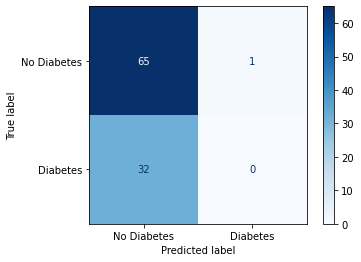

In [42]:
# Define labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Display train scores
print('Training Scores')

# Classification Report
print(classification_report(y_train, train_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()
print('\n')

# Display test scores
print('Testing Scores')

# Classification report
print(classification_report(y_test, test_preds, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',
                                         display_labels=labels)
plt.show()